In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable
import colormaps as cmaps
import os
import scipy as sp
from scipy.ndimage.interpolation import rotate
from magpie_data import PolarimetryMap2, FaradayMap2, NeLMap2, Interferogram, OpticalFrames
import scipy.constants as c
from mcerp import N, umath, Gamma
from bdots import *
import pickle
from matplotlib import rc
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino Linotype']})

In [2]:
cd "~\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15\s1214_15 shifted


In [3]:
s1214_15=OpticalFrames(168,20)
s=s1214_15
s.logarithm()
s.rotate(-90+56)
#s.plot_rot(frame=2)
s.crop((512,608), xcrop=230, ycrop=300)
#s.plot_crop()

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:329: RuntimeWarning: divide by zero encountered in log
  self.s_l=[np.log(s_im) for s_im in self.s_n]


<IPython.core.display.Javascript object>


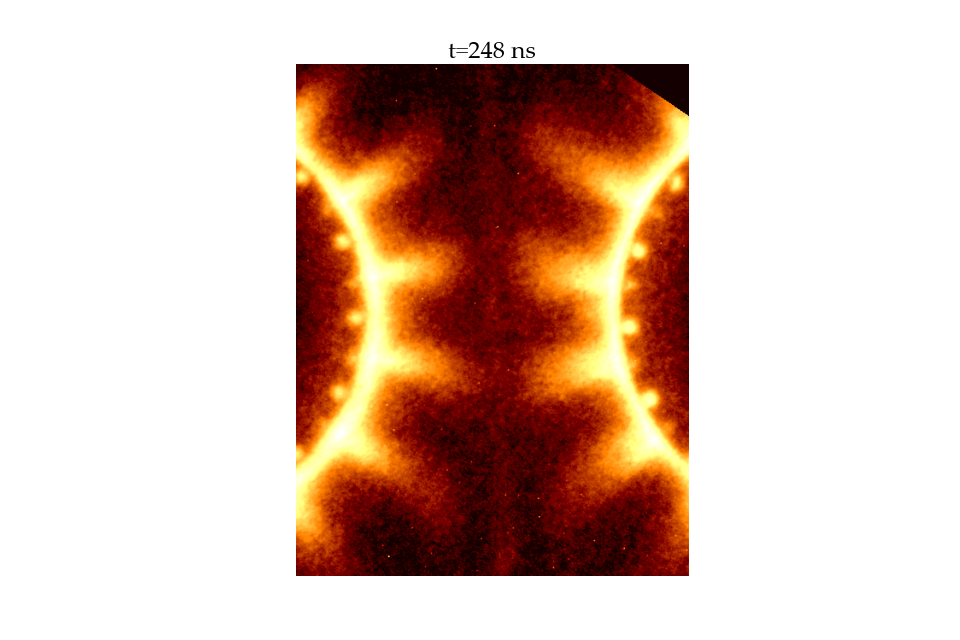

In [7]:
s1214_15.plot_crop(frame=5)

<IPython.core.display.Javascript object>


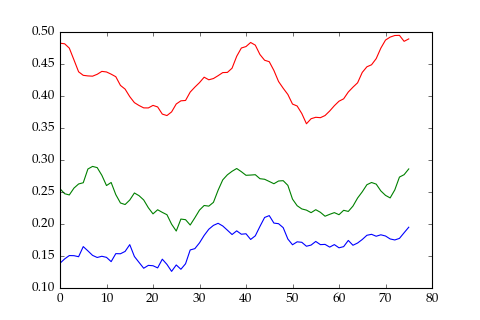

In [10]:
from skimage.measure import profile_line

start_px=(300,190)
end_px=(300,265)
lineout_width=20

fig, ax=plt.subplots(figsize=(6,4))

for sc in s1214_15.s_c[4:7]:
    lo=profile_line(sc, start_px,end_px,linewidth=lineout_width)
    ax.plot(lo)

In [4]:
%cd "~\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS"
rot=-90
s0612_15_532=NeLMap2('s0612_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s0612_15_532
s.set_origin(origin=(2430,1450), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow"
rot=-90
s1006_15_532=NeLMap2('s1006_15 532nm neL.txt', scale=173, rot_angle=rot, multiply_by=1/1.6)
s=s1006_15_532
s.set_origin(origin=(2305,1411), extent=[-11.5,11.5,-8,8])

rot=-90
s1006_15_355=NeLMap2('s1006_15 355nm neL itilt.txt', scale=128, rot_angle=rot, multiply_by=1/1.6, flip_lr=True)
s=s1006_15_355
s.set_origin(origin=(1618,1195), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns"

s1026_15_532=NeLMap2('s1026_15 532nm neL.txt', scale=173, rot_angle=-90, multiply_by=1/1.6)
s1026_15_532.set_origin(origin=(2377,1438), extent=[-11.5,11.5,-8,8])
s=s1026_15_532

s1026_15_355=NeLMap2('s1026_15 355nm neL.txt', scale=128, multiply_by=2/1.6, rot_angle=-90, flip_lr=True)
s1026_15_355.set_origin(origin=(1540,1110), extent=[-11.5,11.5,-8,8])
s=s1026_15_355

%cd "~\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS"

s0429_16_532=NeLMap2('s0429_16 532nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5)
s=s0429_16_532
s.set_origin(origin=(2850,2348), extent=[-11.5,11.5,-8,8])

s0429_16_355=NeLMap2('s0429_16 355nm neL.txt', scale=168, multiply_by=1/1.6, rot_angle=-90+22.5, flip_lr=True)
s=s0429_16_355
s.set_origin(origin=(2711,2268), extent=[-11.5,11.5,-8,8])

%cd "~\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday"

s0830_16_532=NeLMap2('s0830_16 532nm neL.txt', scale=173, rot_angle=-90+1.3, multiply_by=1/1.6)
s=s0830_16_532
s.set_origin(origin=(2250,1554),extent=[-11.5,11.5,-8,8])

C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s0612_15 RECONNECTION C TS


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1006_15 Reconnection C TS upstream flow
C:\Users\jdhare\Google Drive\MAGPIE\data\2015\s1026_15 Reconnection C TS Outflow 255ns
C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0429_16 C Reconnection TS
C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0830_16 Reconnection C Faraday


In [19]:
s=s1006_15_355
s.set_origin(origin=(1618,1195), extent=[-11.5,11.5,-8,8])


C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


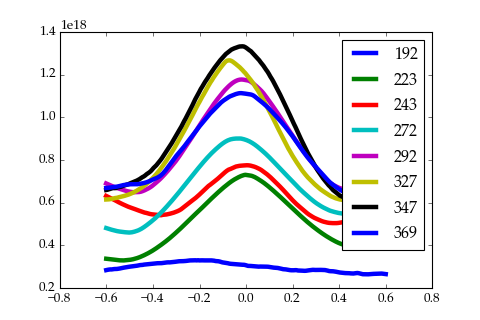

(1989, 1280) (1989, 1487)
(1989, 1280) (1989, 1487)
(1472, 947) (1472, 1100)
(1989, 1280) (1989, 1487)
(1472, 947) (1472, 1100)
(1932, 1243) (1932, 1444)
(1932, 1243) (1932, 1444)
(1989, 1280) (1989, 1487)


In [20]:
shots=[s0612_15_532, s1006_15_532, s1006_15_355, s1026_15_532, s1026_15_355, s0429_16_532, s0429_16_355, s0830_16_532]
t=[192,223,243,272,292,327,347,369]

start=(0,-0.6)
end=(0,0.6)
lineout_width=200

fig,ax=plt.subplots(figsize=(6,4))

for s,tt in zip(shots,t):
    s.create_lineout(start, end,lineout_width=lineout_width)
    s.plot_lineout(ax, label=tt)
    
ax.legend()

<IPython.core.display.Javascript object>


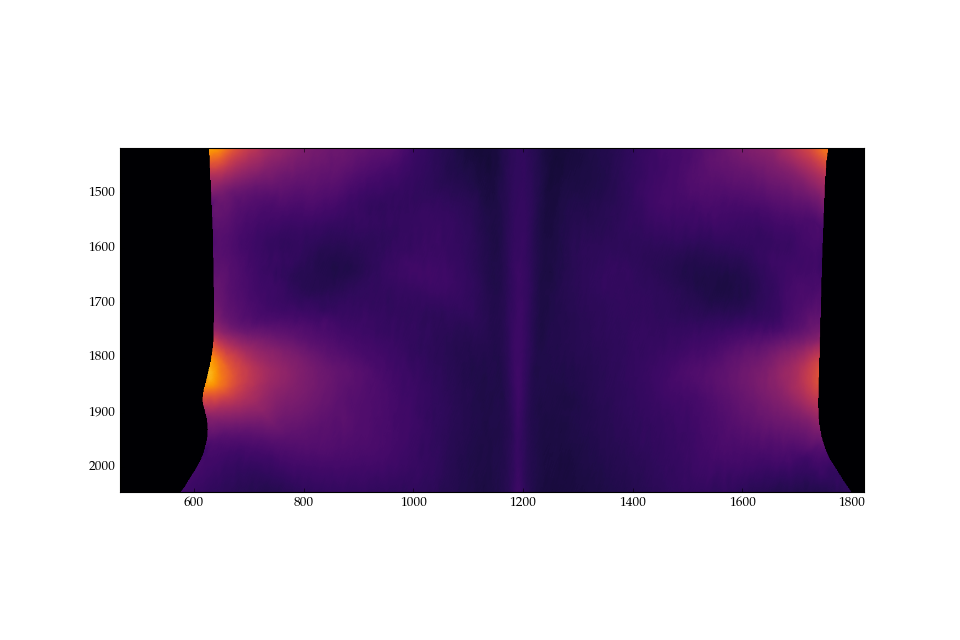

In [18]:
s1006_15_355.plot_data_px()